# A Motivating Example

Steve Pittard wsp@emory.edu (citations to other sources are inline) 

Here is a high level over view of an ML work flow. Note that:

* It is a cycle, quite likely to be repeated multiple times before arriving at some actionable result
* The driving questions / hypotheses are subject to change, redefinition, or abandonment
* Multiple people might be involved

<img src="pics/workflow2.png" width ="600" height=600>

## A More Detailed Workflow

Thus far we haven’t gotten our hands dirty but we’ll need to do that if we want an experiential approach to any of this. It’s useful to have a schematic that outlines the general process. Consider the following workflow. In general this is a solid representation of what one might do as part of building a predictive model.

<img src="pics/workflow.jpg" width ="600" height=600>

## Using the mtcars Data Set

Let's keep working with the mtcars data frame. This data set is popular in R education but we'll use it here in our Python course because it is straightforwrd to understnad.

```
Motor Trend Car Road Tests
Description
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

Usage
mtcars
Format
A data frame with 32 observations on 11 (numeric) variables.

[, 1]	mpg	Miles/(US) gallon
[, 2]	cyl	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs	Engine (0 = V-shaped, 1 = straight)
[, 9]	am	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
[,11]	carb	Number of carburetors

Source
Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.
```

Visualization winds up being the gateway into forming hypotheses to help drive the aims of any machine learning project. On the other hand, some people just start building models with variables they believe to be of interest and only later worry about how the data might look. With respect to the above data frame, the idea of Fuel Economy is usually a popular concept which then leads one to look at the mpg feature in the data set.

Remember for the “Levels Of Measurement” section and how it is wise to determine what features are cateogrical or continuous. Within those categories we can then make finer distinctions (e.g. “nominal” vs “ordinal”) if we need to. Let's look at the number of unique values in each column. This gives us an idea as to whether a column represents a catgory / factor or a continuous quantity. 


In [1]:
import pandas as pd
# Read in some data
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"

# Setup some helpful tools
import pandas as pd
mtcars = pd.read_csv(url)

mtcars.nunique().sort_values(ascending=True)

vs       2
am       2
cyl      3
gear     3
carb     6
hp      22
drat    22
mpg     25
disp    27
wt      29
qsec    30
dtype: int64

In [2]:
# Sometimes categories are not labelled as "object" but not always
mtcars.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

Which of the variables are categories ? Which of the categories are ordinal (if any) ? Not all data sets have a clear cut variable that you are trying to predict. Sometimes you go on a “fishing expedition” to find interesting variables and it’s only after working with the data, building models, and evaluating them that one comes to an understanding of what variables / features are actually relevant. In the mean time though, doing some plots can be helpful

### Scatterplots

For continuous quantities, things like histograms, scatterplots, strip charts, and dot plots can be useful. Let’s look at a pairs plot which plots each variable in the data frame against all others to see if there are any obvious linear relationships between any of the variables. Some of these variables can be considered as factors or categories (such as cyl, vs, am, gear, and carb)

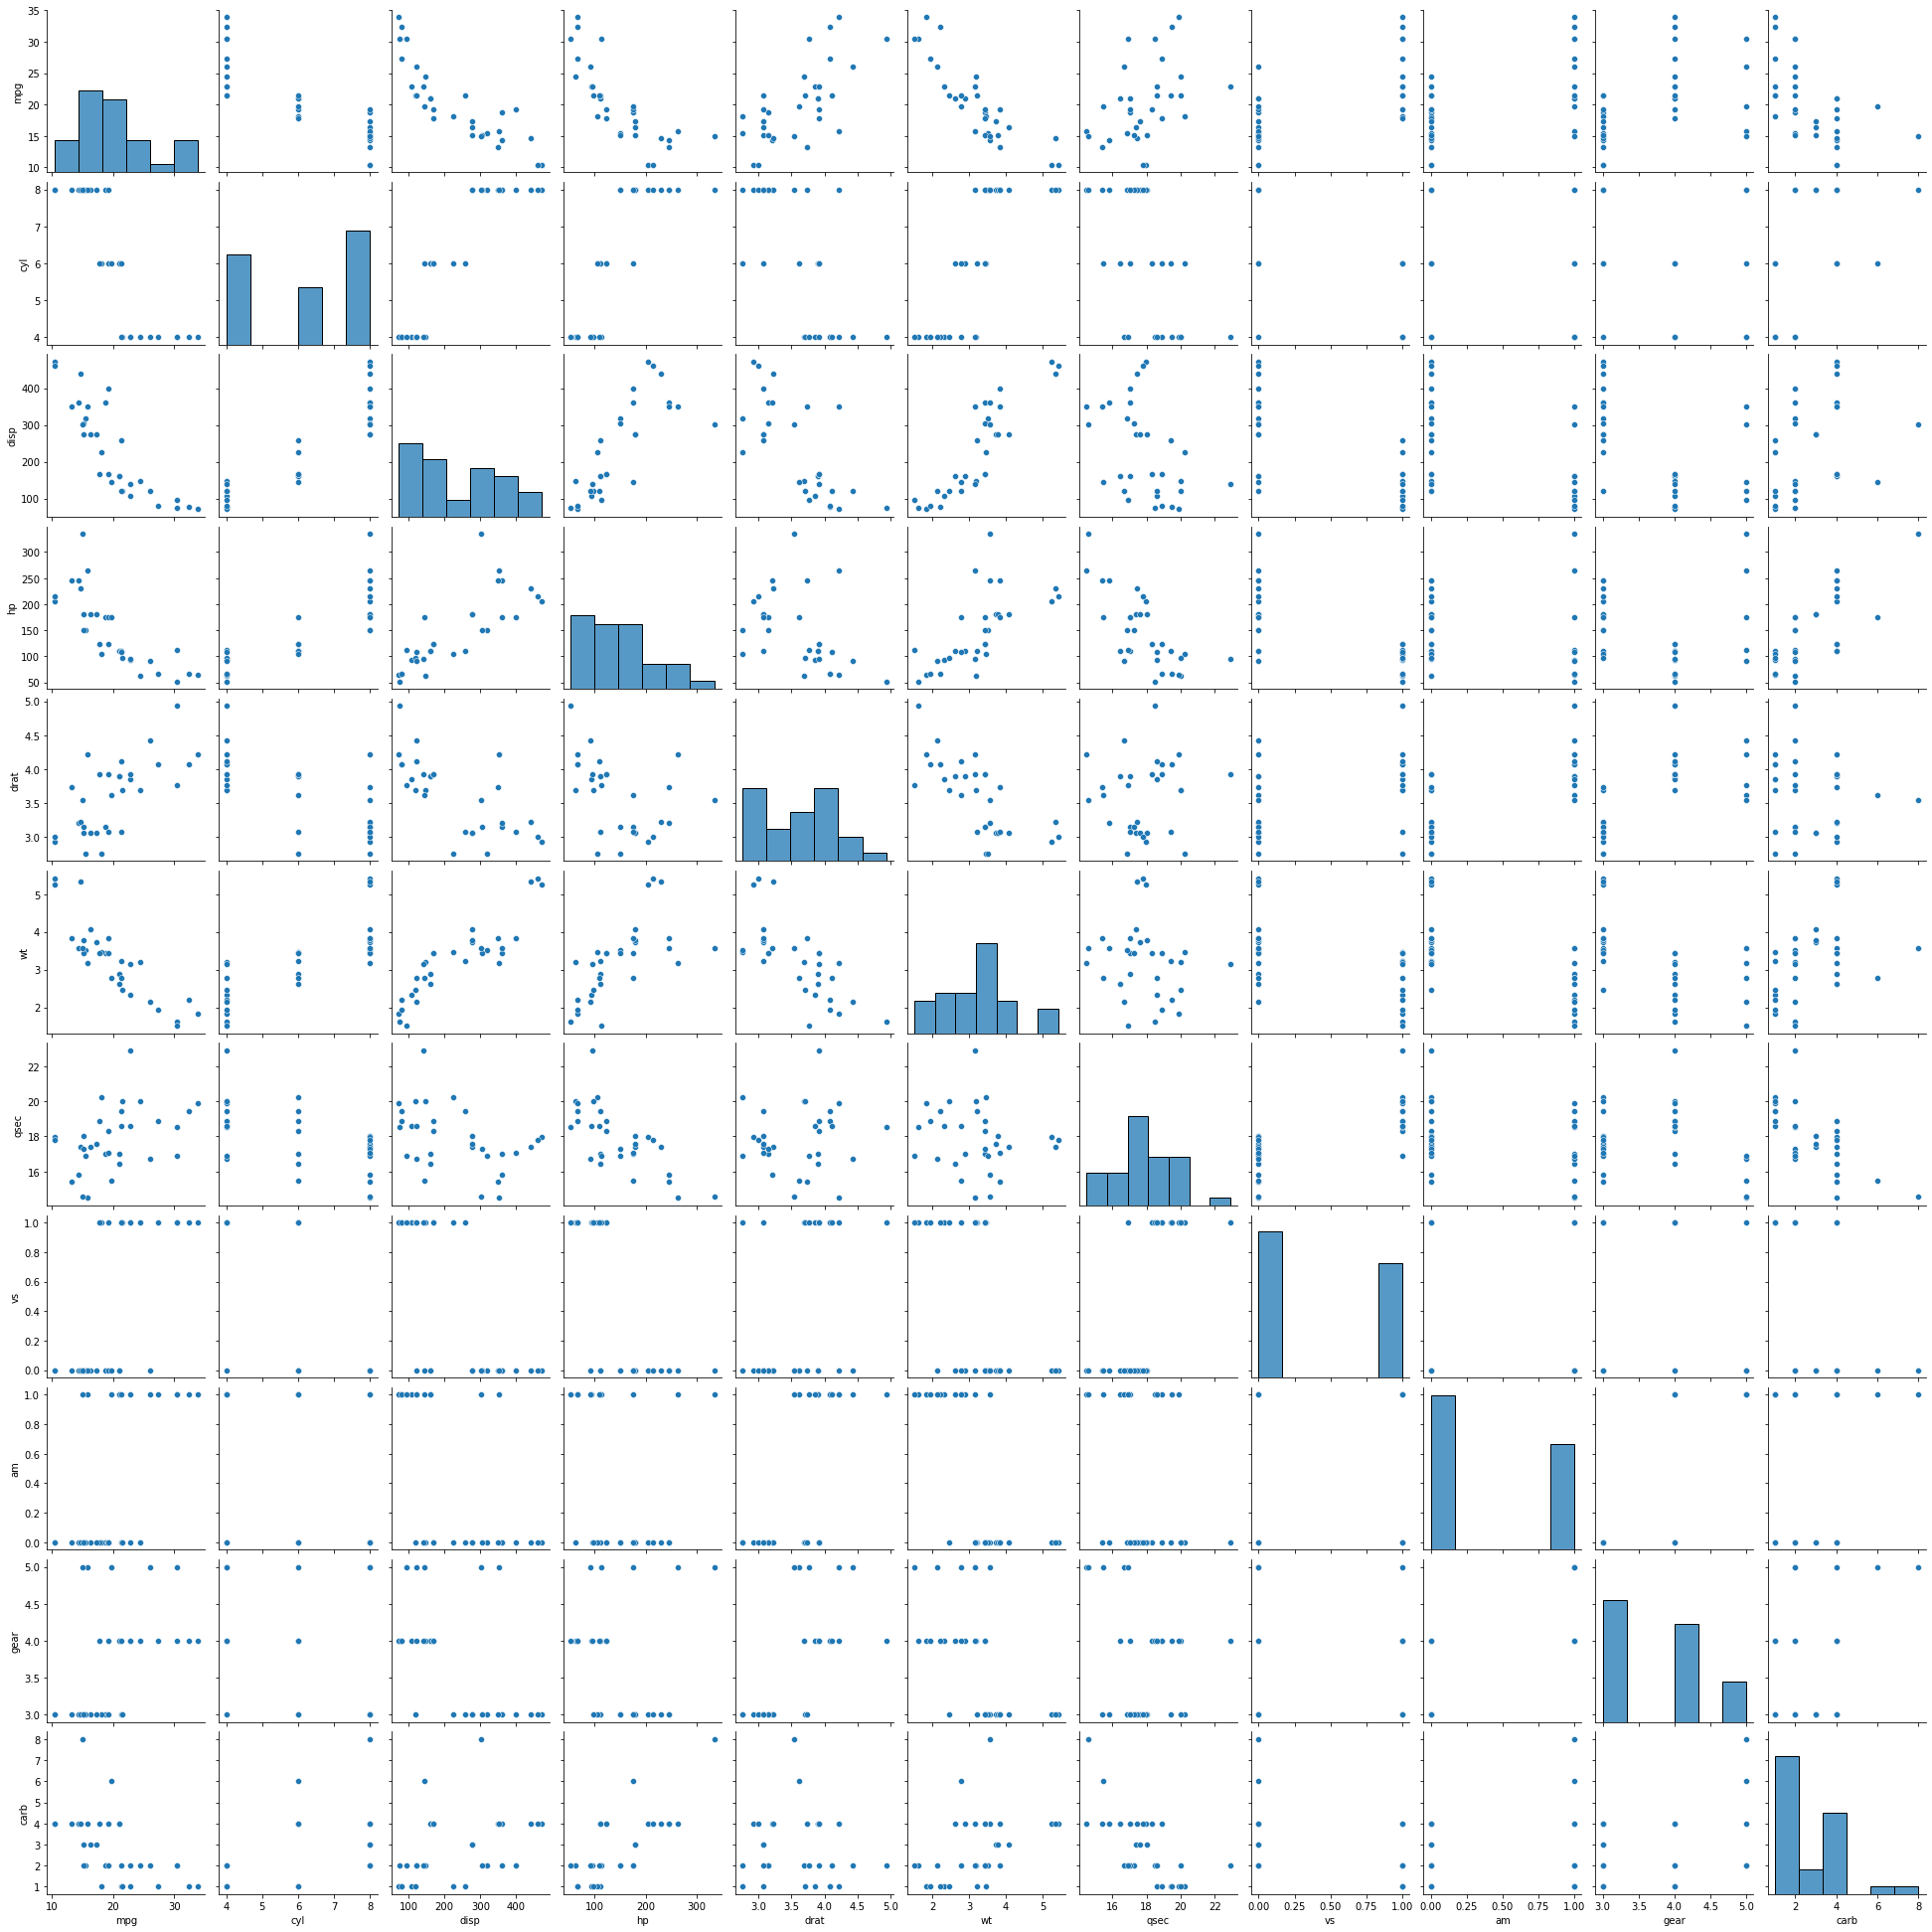

In [3]:
# Seaborn visualization library
import seaborn as sns# Create the default pairplot
sns.pairplot(mtcars)

Wow. So this winds up being a little busy. Why don't we reduce the number of columns under consideration here to make things more legible ? We will exclude them to focus only on the continuous / measured variables.

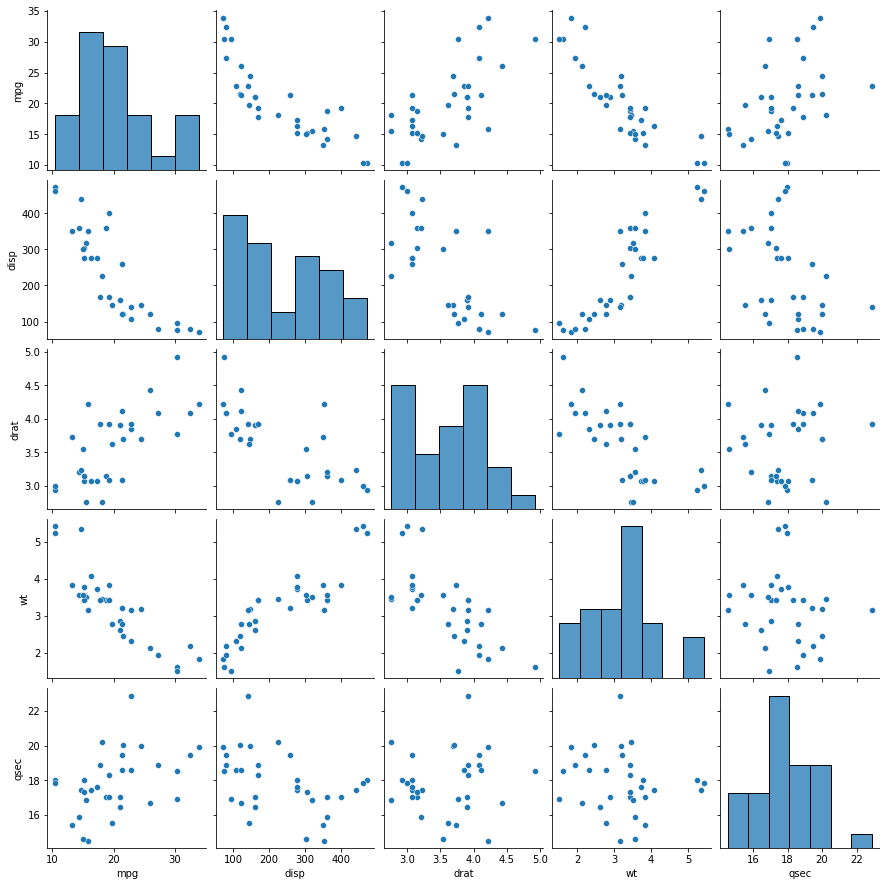

In [9]:
sns.pairplot(mtcars.select_dtypes('float'))

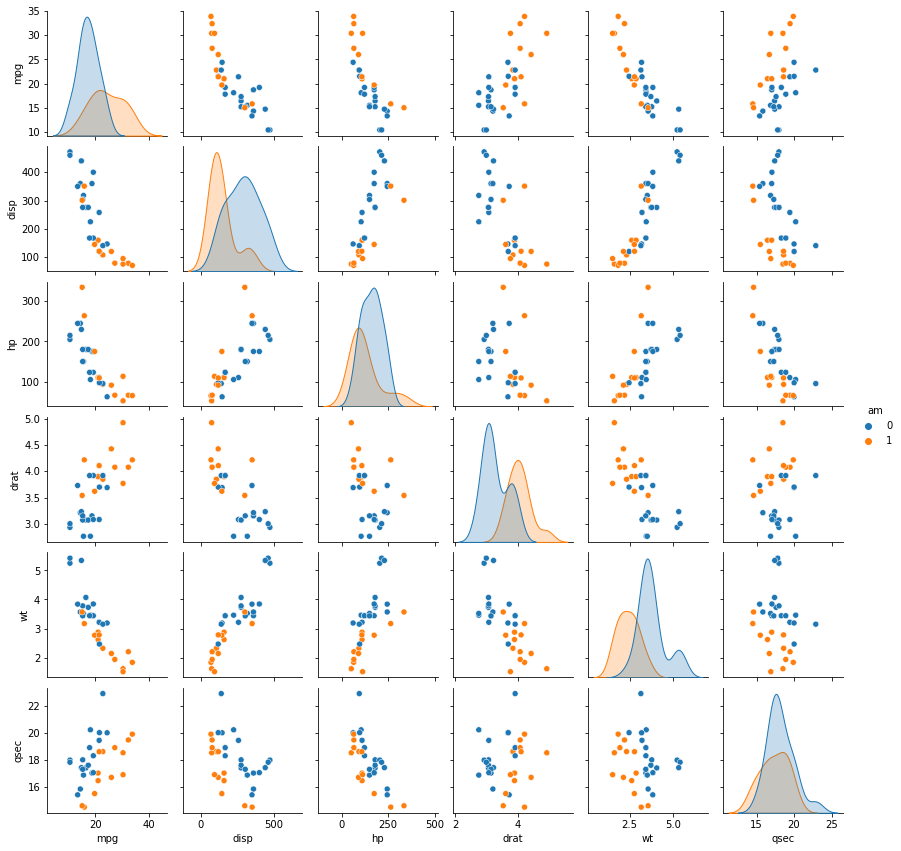

In [10]:
# Of course we can select specific columns
sns.pairplot(mtcars.iloc[:,[0,2,3,4,5,6,8]],hue='am',height=2)

<AxesSubplot:title={'center':'mpg'}, xlabel='cyl'>

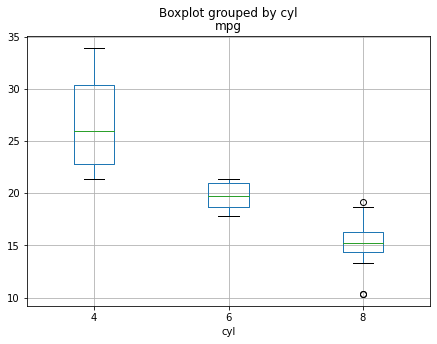

In [4]:
# Let's look at the MPG boxplots for each cylinder group
mtcars.boxplot('mpg',by='cyl',figsize=(7,5))

<AxesSubplot:title={'center':'mpg'}, xlabel='am'>

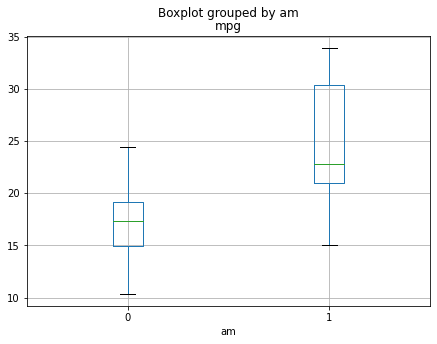

In [5]:
# Let's look at the MPG boxplots for each transmission type
mtcars.boxplot('mpg',by='am',figsize=(7,5))

<AxesSubplot:title={'center':'mpg'}, xlabel='[cyl, am]'>

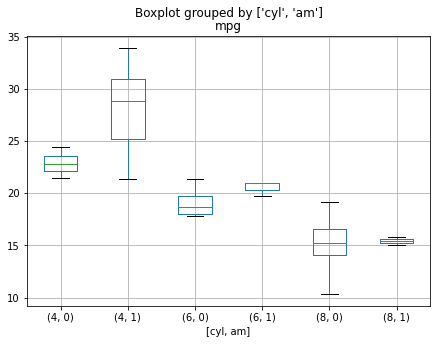

In [6]:
mtcars.boxplot('mpg',by=['cyl','am'],figsize=(7,5))

## Histograms

Another favorite plot type for numeric data is the histogram although we don’t have much data here. Still, we can make a histogram of the MPG to get a sense of a possible distribution. This could look better but you get the overall message that most cars exhibit MPG in the range of 12-25 MPG.

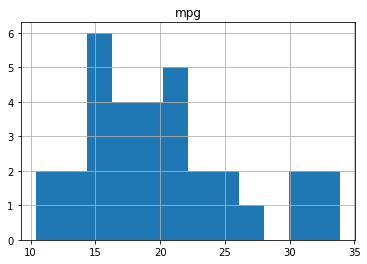

In [7]:
boxplot = mtcars.hist('mpg',bins=12)

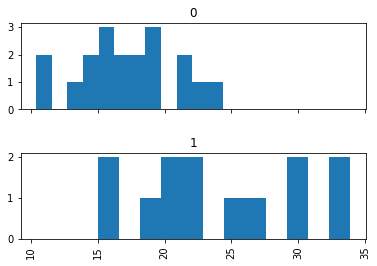

In [8]:
# Look at the distribution of MPG by Transmission Type
boxplot = mtcars.hist('mpg', by='am',layout=(2, 1),bins=12,sharex=True)

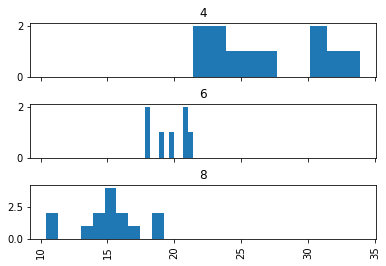

In [9]:
# Look at the distribution of MPG by Cylinder Group
boxplot = mtcars.hist('mpg', by='cyl',layout=(3, 1),sharex=True)

## Tables

Tables a are a good way to visualize relationships between categories. This might be helpful to identify what categories are more (or less) frequently occurring. One need not use graphics to see these relationships. Text Tables can easily be made although they can become hard to interpret.

In [10]:
table = pd.crosstab(mtcars['cyl'],mtcars['am'])
print(table)

am    0  1
cyl       
4     3  8
6     4  3
8    12  2


<AxesSubplot:title={'center':'Cars by Cylinder Group'}, xlabel='cyl'>

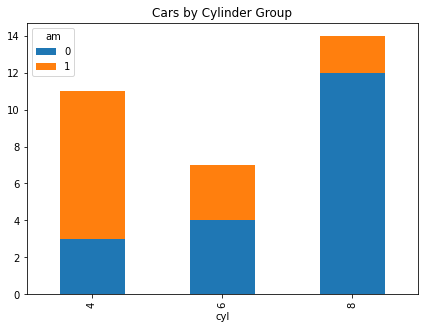

In [11]:
table.plot(kind='bar', stacked=True, figsize=(7,5),title="Cars by Cylinder Group")

<AxesSubplot:title={'center':'Cars by Transmission Type'}, xlabel='am'>

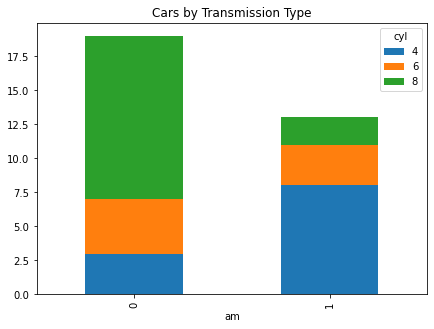

In [20]:
pd.crosstab(mtcars['am'],mtcars['cyl']).plot(kind='bar', stacked=True, figsize=(7,5),title="Cars by Transmission Type")

## Correlations

Let’s look at some correlations to see how we might predict MPG as a function of other variables in the data set. Note that this isn’t an in-depth modeling lecture so we will fast track over deep discussions on how to fully evaluate and diagnose a model emerging from a specific method - although that is important. But, in the interest of motivating a work flow, we’ll simplify some of those discussions for now.

           mpg      disp      drat        wt      qsec
mpg   1.000000 -0.847551  0.681172 -0.867659  0.418684
disp -0.847551  1.000000 -0.710214  0.887980 -0.433698
drat  0.681172 -0.710214  1.000000 -0.712441  0.091205
wt   -0.867659  0.887980 -0.712441  1.000000 -0.174716
qsec  0.418684 -0.433698  0.091205 -0.174716  1.000000


<AxesSubplot:>

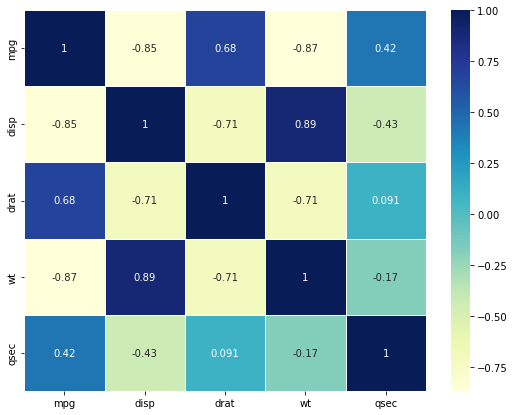

In [22]:
import matplotlib.pyplot as plt
corr_mat = mtcars.select_dtypes('float').corr()
print(corr_mat)
plt.figure(figsize=(9,7))
sns.heatmap(corr_mat, annot = True, cmap="YlGnBu",linewidths=.7)

<AxesSubplot:>

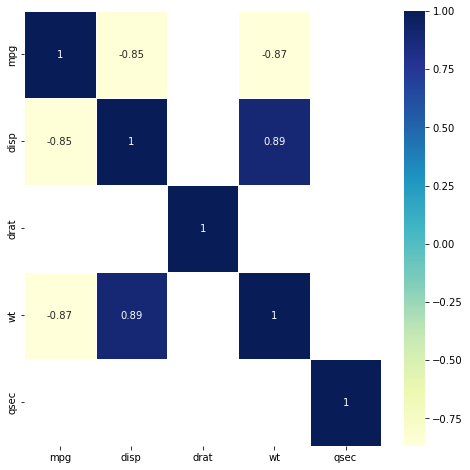

In [23]:
threshold = corr_mat[abs(corr_mat) >= .75]
plt.figure(figsize=(8,8))
sns.heatmap(threshold, annot = True, cmap="YlGnBu",linewidths=.7)

## Building A Model - In Sample Data

So now we will use the above information to build a linear model using the mtcars data frame. We’ll turn around and use the same exact data frame to test our model - Any resulting error we see will be in-sample error and will not generalize well to any new data we might discover. Thus, the model will not help us anticipate any out-of-sample error.

In [12]:
import statsmodels.api as sm 
x = mtcars.wt
y = mtcars.mpg

x = sm.add_constant(x)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.29e-10
Time:                        11:43:47   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.0

/Users/esteban/opt/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Breakdown

**R-squared:** the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained
    
**Adj. R-squared:** Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model.
 
**F-statistic:** the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.

**coef:** the coefficients of the independent variables and the constant term in the equation.

**t:** the value of t-statistic. It is the ratio of the difference between the estimated and hypothesised value of a parameter, to the standard error

Now that we have a model, we could use it to predict the y values which in this case is the MPG. This model is not at all complicated.


0    23.282510
1    21.919663
2    24.885860
3    20.102532
Name: wt, dtype: float64


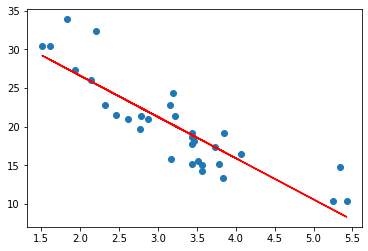

In [14]:
import matplotlib.pyplot as plt
x = mtcars.wt
y = mtcars.mpg

# Plot the original data
plt.scatter(x, y) 

# Now plot the regression line on top of it
regline = 37.2851 - 5.3445*mtcars.wt

print(regline[0:4])
plt.plot(x,regline,'r')


In [15]:
# Note that we can extract info directly from the result
print(result.params)

# Recompute regline directly from the results object
regline = result.params[1]*mtcars.wt + result.params[0]
print(regline[0:4])

# Or just call the predict function which matches regline above
regline = result.predict()
print(regline[0:4])

const    37.285126
wt       -5.344472
dtype: float64
0    23.282611
1    21.919770
2    24.885952
3    20.102650
Name: wt, dtype: float64
[23.28261065 21.9197704  24.88595212 20.10265006]


## Evaluating

Let’s compute the RMSE for this model. The formula for this is:

$$ RMSE = \sqrt\frac{\sum_i^n(P_i-O_i)^2}{n} $$

In [16]:
def rmse(actual,predictions):
   from math import sqrt
   myrmse = sqrt(((predictions-actual)**2).mean())
   return round(myrmse,3)

print(rmse(mtcars.mpg,regline))

2.949


Is this good ? Bad ? Just average ? Well we don’t really know. One good thing is that the metric is in terms of the predicted variable, mpg, so it can easily be interpreted. If the RMSE is roughly 3.0 we can see that the MPG variable itself ranges from 10.4 up to 33.9 so any prediction of **mpg** we make using the *training* data is estimated to plus or minus 3. 

In [17]:
mtcars.mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

However, unless someone has specified a tolerance level for the RMSE we don’t know if we have something that can be extended to other car types. We also could experiment with other regression formula to see if the RMSE goes down (or up). Also, it's common for predictions on trainining data, the information used to create the model, are usually better than predictions made on holdout or unseen data. The whole purpose of building models is to get an idea about how they might peform on out-of-sample data. 

## Out Of Sample Data

Now let’s repeat this exercise by generating a linear model on a subset of the mtcars data frame and then apply that model to the remaining data. In modeling parlance this is known as having a “training” and “test” data set.

The idea here is to build a model using say the first 21 rows of mtcars (a training set that is roughly 65% of the data) and then use a test set, rows 22 - 32 of mtcars, as input to the model to determine how well the model performs.

Remember - we want to minimize the RMSE. The first 21 rows are outlined in green and rows 22-32 are outlined in red. This means we are training on a subset of the data and we hope that any model we build thereon will be extensible to the holdout or test data frame

<img src="pics/mtcars.png" width ="600" height=600>



In [18]:
mtcars.iloc[1:22,]

ols_train = mtcars.iloc[1:22,]
x = ols_train.wt
y = ols_train.mpg

x = sm.add_constant(x)
result = sm.OLS(y,x).fit()
print(result.params)

const    38.257540
wt       -5.394459
dtype: float64


/Users/esteban/opt/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
# Observe the RMSE for the training data

print(rmse(ols_train.mpg,result.predict()))

2.978


In [20]:
# Now let's see how well the OLS solution works on the test data
ols_test = mtcars.iloc[22:33,]

x = ols_train.wt
y = ols_train.mpg

print(rmse(ols_test.mpg,result.params[1]*ols_test.wt + result.params[0]))


3.216


We trained the model on the first 21 rows of the data frame which might contain some outliers (or not). The RMSE got larger ! Does this mean the model is “bad” ? Maybe, maybe not.

One thing we could do is to experiment with another split of the data, perhaps in a different proportion (e.g. 80/20) or maybe even a series of splits to see if we can get an idea of how widely the RMSE varies. Here we create a sample of 80% of mtcars to create a training set.

In [21]:
train = mtcars.sample(frac=.80,random_state=3)
print(train.shape)
train.head()

(26, 11)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
20,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
17,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
14,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
28,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


In [22]:
test = mtcars.drop(train.index)
print(test.shape)
test.head()

(6, 11)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
10,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
24,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
25,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


In [23]:
# Generate the OLS Model on the randomly selected training data

x = train.wt
y = train.mpg

x = sm.add_constant(x)
result = sm.OLS(y,x).fit()
print(result.params)

# Compute the training RMSE

print(rmse(train.mpg,result.predict()))

const    37.148070
wt       -5.327754
dtype: float64
3.121


/Users/esteban/opt/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Next look at the test data RMSE

In [24]:
print(rmse(test.mpg,result.predict(sm.add_constant(test.wt))))

2.054


## Additional Considerations

So in smaller data sets it can be useful to choose a different split that allocates more data to the testing dataset such as a 60/40 or 70/30 split. It might also be useful to first shuffle the data frame in case there is some type of intrinsic ordering of which we were unaware. Both of these are easy to do. We can write a function that handles this for us so we don't have to keep writing standalone lines of vode.

In [25]:
def sample_and_model(prop=.60):
    
    train = mtcars.sample(frac=prop)
    test  = mtcars.drop(train.index)
    
    result = sm.OLS(train.mpg,sm.add_constant(train.wt)).fit()
    train_rmse = rmse(train.mpg,result.predict(sm.add_constant(train.wt)))
    test_rmse  = rmse(test.mpg,result.predict(sm.add_constant(test.wt)))
    
    return train_rmse, test_rmse, prop

In [26]:
sample_and_model(prop=.60)

(2.588, 3.502, 0.6)

The first thing to notice is that multiple calls to the function can yield different RMSE values even without changing the proportion of the train / test sets. Let’s call this function 100 times with the 70/30 split and check the resulting boxplot to see how the RMSE values vary

In [27]:
import numpy as np

# Use a list comprehension to capture 100 executions of sample_and_model
arr  = [ sample_and_model(.7) for ii in range(0,100) ]

# Print the first 5 rows of the arr list
arr[0:5]

[(2.576, 3.713, 0.7),
 (2.986, 2.867, 0.7),
 (2.551, 3.698, 0.7),
 (2.366, 3.953, 0.7),
 (3.276, 2.1, 0.7)]

Text(0.5, 1.0, 'Training vs Test RMSE')

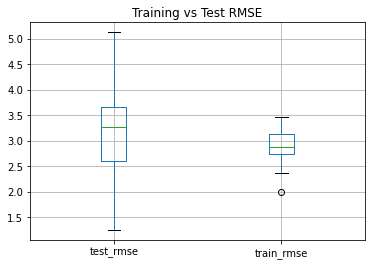

In [28]:
df = pd.DataFrame(arr,columns=["train_rmse","test_rmse","proportion"])
df.head()
df.boxplot(['test_rmse','train_rmse'])
plt.title("Training vs Test RMSE")

Would this be different if we look at a hundred different samples of a 90/10 split ? 

/Users/esteban/opt/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

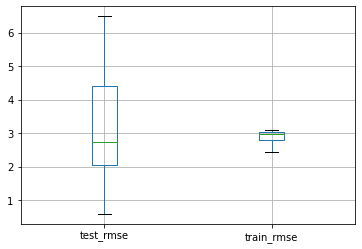

In [29]:
arr  = [ sample_and_model(.9) for ii in range(0,100) ]
                
df = pd.DataFrame(arr,columns=["train_rmse","test_rmse","proportion"])
df.head()
df.boxplot(['test_rmse','train_rmse'])

Maybe we need a way to look at a various proportions. Time to write a function to help out.

/Users/esteban/opt/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


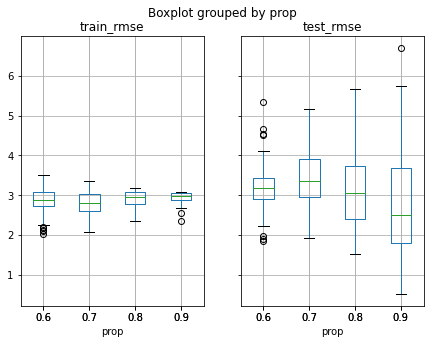

In [30]:
def train_tester(input,iterations):
    
    colnames = ['train_rmse','test_rmse','prop']
    iterations = 100 
    dflist = []
 
    for ii in range(len(input)):
        dflist.append(pd.DataFrame([sample_and_model(input[ii]) for i in range(0,iterations)],columns = colnames))

    total = pd.concat(dflist)
    return total

total = train_tester([.6,.7,.8,.9],100)
total.boxplot(['train_rmse','test_rmse'],by='prop',figsize=(7,5))
plt.show()

Which proportion results in the least variation for the test RMSE? This migh be quite useful when estimating out of sample error. Other splits seem to give a lower median RMSE but also appear to have more variation.

## Other Methods

Could we improve the situation by using another modeling method ? Or maybe by using another formula ? This would be something that we could try with out much effort as long as we know the name of the method and how to call it. This can sometimes be a challenge as you have to find the documentation for it and figure out how to prepare the data before calling the command. In the above case we just used the formula interface which is favored in R but not all functions support that. Just to say that you will generally have to study each new function to see how it works.

Let’s check out the XGBoost function which is an algorithm that has enjoyed recent popularity and celebrity in the world of Data Science. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

XGBoost requires us to specify the input as matrices. We also have to give it the input in the form of X, Y arguments where the first is a matrix of all the predictor variables and the latter is the thing being predicted. 

How does this perform in the prediction phase ? It turns out that it’s pretty impressive when compared to the humble lm function. The question remains though which method is easier to defend if you were challenged ? The lm function implements a very well established and well known model whose parameters are well known. So even though XGBoost seems to be good at minimizing the RMSE it might be better to stick with an approach like lm even if it performs more poorly.


In [31]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

X = mtcars.wt.values
y = mtcars.mpg.values

xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X.reshape(-1,1),y)

score = xgbr.score(X.reshape(-1,1), y)  
print("Training score: ", score)


ypred = xgbr.predict(X.reshape(-1,1))
print(ypred)

print("Training RMSE: %.2f" % (rmse(y,ypred)))

Training score:  0.9988882048487874
[20.99969   21.003948  22.803267  21.399849  18.565762  18.099644
 14.651995  24.395176  22.794813  18.565762  18.565762  16.400278
 17.295818  15.200505  10.403415  10.4024935 14.697234  32.3966
 30.400229  33.896336  21.49731   15.499877  15.204379  13.303097
 19.196756  27.30007   26.002773  30.400229  15.805384  19.703346
 14.651995  21.395855 ]
Training RMSE: 0.20


So let's use the power of functions to help us automate some things. We'll repeat what we did before when were using the OLS approach. Except we'll use xgboost instead. Note that the taining error is much lower than the testing error.

In [32]:
def sample_and_boost(prop=.60):
    import xgboost as xgb
    from sklearn.metrics import mean_squared_error
    
    # Sample some number of rows from mtcars
    train = mtcars.sample(frac=prop)
    
    # Take as test, what is leftover from the sampled mtcars
    test  = mtcars.drop(train.index)
   

    X = train.wt.values
    y = train.mpg.values

    xgbr = xgb.XGBRegressor(verbosity=0) 
    xgbr.fit(X.reshape(-1,1),y)

    score = xgbr.score(X.reshape(-1,1), y)  

    # Predict using the Training data - rmse should be small
    ypred = xgbr.predict(X.reshape(-1,1))
    train_mse = mean_squared_error(y, ypred)
    train_rmse = train_mse*(1/2.0)
    
    # Get the same info for the test data
    testX = test.wt.values
    testy = test.mpg.values
    
    testypred = xgbr.predict(testX.reshape(-1,1))
    test_rmse = rmse(testy,testypred)
    
    return train_rmse, test_rmse, prop

sample_and_boost(.75)

(0.02097363747900843, 4.746, 0.75)

    train_rmse  test_rmse  prop
0     0.000001      4.463   0.6
1     0.032939      3.749   0.6
2     0.000001      3.137   0.6
3     0.000001      3.610   0.6
4     0.000001      4.060   0.6
..         ...        ...   ...
45    0.021582      4.403   0.9
46    0.017358      3.567   0.9
47    0.011209      3.809   0.9
48    0.011209      0.736   0.9
49    0.017357      4.020   0.9

[200 rows x 3 columns]


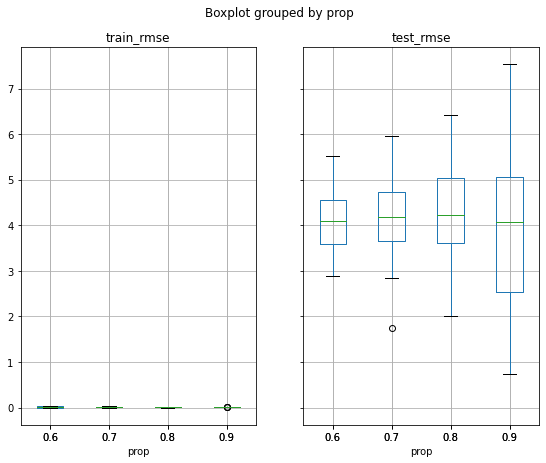

In [33]:
def train_tester(input,func,iterations):
    
    colnames = ['train_rmse','test_rmse','prop']
    dflist = []
 
    for ii in range(len(input)):
        dflist.append(pd.DataFrame([func(input[ii]) for i in range(iterations)],columns = colnames))

    total = pd.concat(dflist)
    return total

total = train_tester([.6,.7,.8,.9],sample_and_boost,50)
print(total)
total.boxplot(['train_rmse','test_rmse'],by='prop',figsize=(9,7))
plt.show()

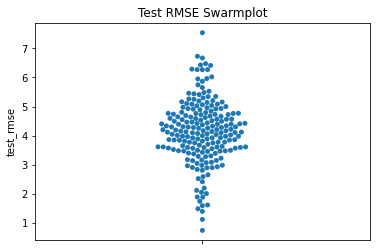

In [34]:
# check out the swam plot from seaborn which shows us 
# around which values the RMSE "clumps"

import seaborn as sns
sns.swarmplot(y='test_rmse',data=total)
plt.title("Test RMSE Swarmplot")
plt.show()

     prop    variable     value
0     0.6  train_rmse  0.000001
1     0.6  train_rmse  0.032939
2     0.6  train_rmse  0.000001
3     0.6  train_rmse  0.000001
4     0.6  train_rmse  0.000001
..    ...         ...       ...
395   0.9   test_rmse  4.403000
396   0.9   test_rmse  3.567000
397   0.9   test_rmse  3.809000
398   0.9   test_rmse  0.736000
399   0.9   test_rmse  4.020000

[400 rows x 3 columns]


<AxesSubplot:xlabel='prop', ylabel='value'>

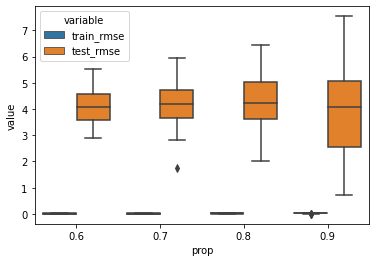

In [35]:
# We can Melt this data to get side by side for each proportion value
melted_total = total.melt(id_vars=['prop'])
print(melted_total)
sns.boxplot(x="prop", y="value", hue="variable", data=melted_total)

/Users/esteban/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='variable', ylabel='value'>

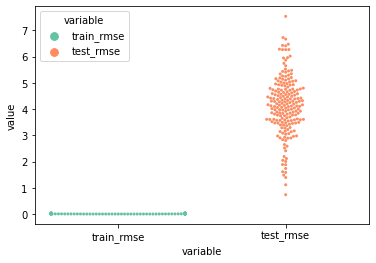

In [36]:
# check out the swam plot from seaborn which shows us 
# around which values the RMSE "clumps"

import seaborn as sns
sns.swarmplot(y='value',
              x='variable',
              data=melted_total,
              palette="Set2",
              hue="variable",
              size=3)

## Dummy Model

How does any of this compare to the so called "dummy" or baseline model wherein we simply estimate the **mpg** for any data as simply being the mean of the **mpg** in the training data ? Python has a classifer called "DummyRegressor" to do this. Technically we don't need this since it might be easier to just write some code to do it ourselves but the function accomodates all the methods (e.g. predict, score) that go along with any predicive method in scikit. We are jumping ahead a little bit but it's just to show what a baseline level of performance might look like. 

In [37]:
from sklearn.dummy import DummyRegressor

# Get some training and testing data
dum_train = mtcars.loc[train.index,:]
dum_test  = mtcars.loc[test.index,:]

X_dum_train = dum_train.drop('mpg',axis=1)
y_dum_train = dum_train.mpg

X_dum_test = dum_test.drop('mpg',axis=1)
y_dum_test = dum_test.mpg


# Use the DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_dum_train,y_dum_train)

# Test Preds
y_test_dum_preds = dummy.predict(X_dum_test)
rmse(y_dum_test,y_test_dum_preds)


3.953

## Summary

Aside from trying an alternative method to regression what we have done here is to sample some portion of the original mtcars data frame to use as a training set while holding out the rest of the data to use as a test data to see how well our model performed. We could repeat this (re)sampling activity multiple times to better train our data over different segments or “folds” of data so any model we ultimately generate will “learn” as much from the data as it can without modeling any “noise”.

There are various methods for doing this including K-Fold Cross Validation and Bootstrap Resampling. Let’s dig in a little deeper into these methods because they help us build models that might offer more robust performance when applied to new data.
